# **Selecting the best pipeline**

## **Requirements**

Here we gather the required libraries, classes and function for this notebook.

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

- **Opening the inner results**

In [6]:
with open(r'C:\Users\fscielzo\Documents\DataScience-GitHub\Image Analysis\Image-Classification\Fire-Detection\Results\inner_score.pkl', 'rb') as file:
    inner_score = pickle.load(file)
with open(r'C:\Users\fscielzo\Documents\DataScience-GitHub\Image Analysis\Image-Classification\Fire-Detection\Results\best_params.pkl', 'rb') as file:
    best_params = pickle.load(file)
with open(r'C:\Users\fscielzo\Documents\DataScience-GitHub\Image Analysis\Image-Classification\Fire-Detection\Results\inner_results.pkl', 'rb') as file:
    inner_results = pickle.load(file)

- Formatting the results

In [7]:
inner_score_values = np.array(list(inner_score.values()))
pipeline_names = list(inner_score.keys())
best_pipeline = pipeline_names[np.argmax(inner_score_values)]
best_model = best_pipeline.split('-')[0]
score_best_pipeline = np.max(inner_score_values)

combined_models_score = list(zip(pipeline_names, inner_score_values))
sorted_combined_models_score= sorted(combined_models_score, key=lambda x: x[1], reverse=True)  # Sort from greater to lower
sorted_models, sorted_scores = zip(*sorted_combined_models_score)

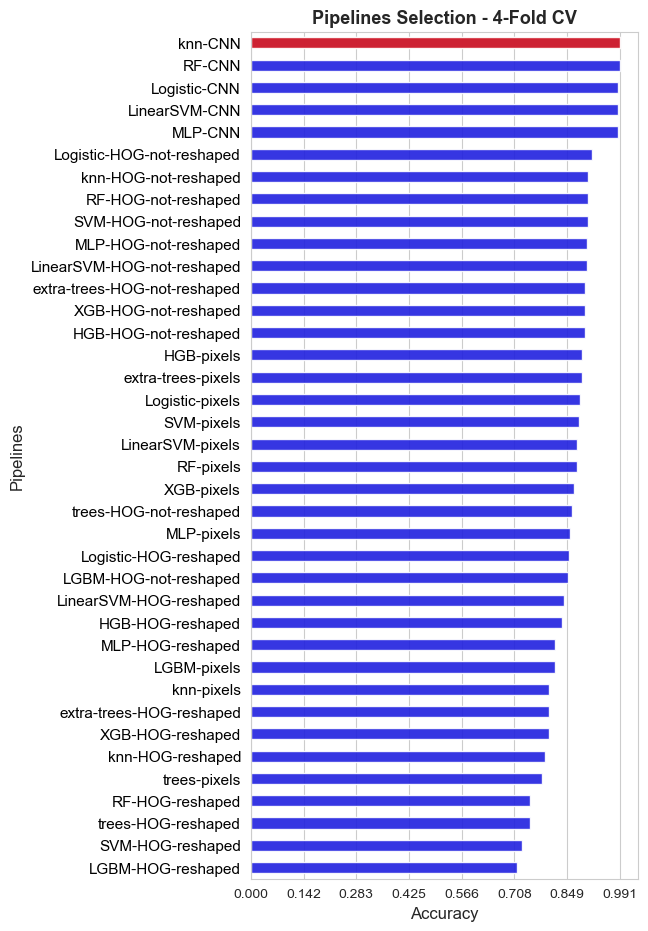

The best pipeline among all the 38 alternatives compared in this final stage, according to the inner evaluation, is: knn-CNN
Accuracy of the best pipeline:  0.991

The best pipeline hyper-parameters are:  {'feature_extraction__method': 'CNN', 'scaler__apply': True, 'pca__apply': True, 'scaler__method': 'min-max', 'pca__n_components': 109, 'knn__n_neighbors': 11, 'knn__metric': 'cosine'}


In [8]:
fig, axes = plt.subplots(figsize=(5,11))
ax = sns.barplot(y=list(sorted_models), x=list(sorted_scores), color='blue', width=0.5, alpha=0.9)
ax = sns.barplot(y=[best_pipeline], x=[score_best_pipeline], color='red', width=0.5, alpha=0.9)
ax.set_ylabel('Pipelines', size=12)
ax.set_xlabel('Accuracy', size=12)
ax.set_xticks(np.round(np.linspace(0, np.max(inner_score_values), 8),3)) 
ax.tick_params(axis='y', labelsize=11)    
plt.title('Pipelines Selection - 4-Fold CV', size=13, weight='bold')
for label in ax.get_yticklabels():
    #label.set_weight('bold')
    label.set_color('black') 
plt.show()

print(f'The best pipeline among all the {len(sorted_scores)} alternatives compared in this final stage, according to the inner evaluation, is: {best_pipeline}')
print('Accuracy of the best pipeline: ', np.round(score_best_pipeline, 3))
print('\nThe best pipeline hyper-parameters are: ', best_params[best_pipeline])

The general conclusion that we extract from the above plot are the following: 

- Is pretty clear that with CNN features achieve outstanding performance, really far away from the one reached with the other features extraction methods. This method seems to work well regardless of the specific classifier.

- The second best method is HOG, specifically when  HOG features vector is not reshaped into a matrix

- Pixels method has a better performance than HOG when the features vector is reshaped. 

- The worst method is reshaped HGO. And we have observed that it warks much worse with Bag of Visual Words (BVW) strategy than with statistics aggregation.